# Data Pre Processing

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant = 0, n_classes = 2, 
                           n_clusters_per_class = 1, random_state = 41, hypercube = False, class_sep = 40)

In [27]:
X.shape

(100, 2)

<IPython.core.display.Javascript object>


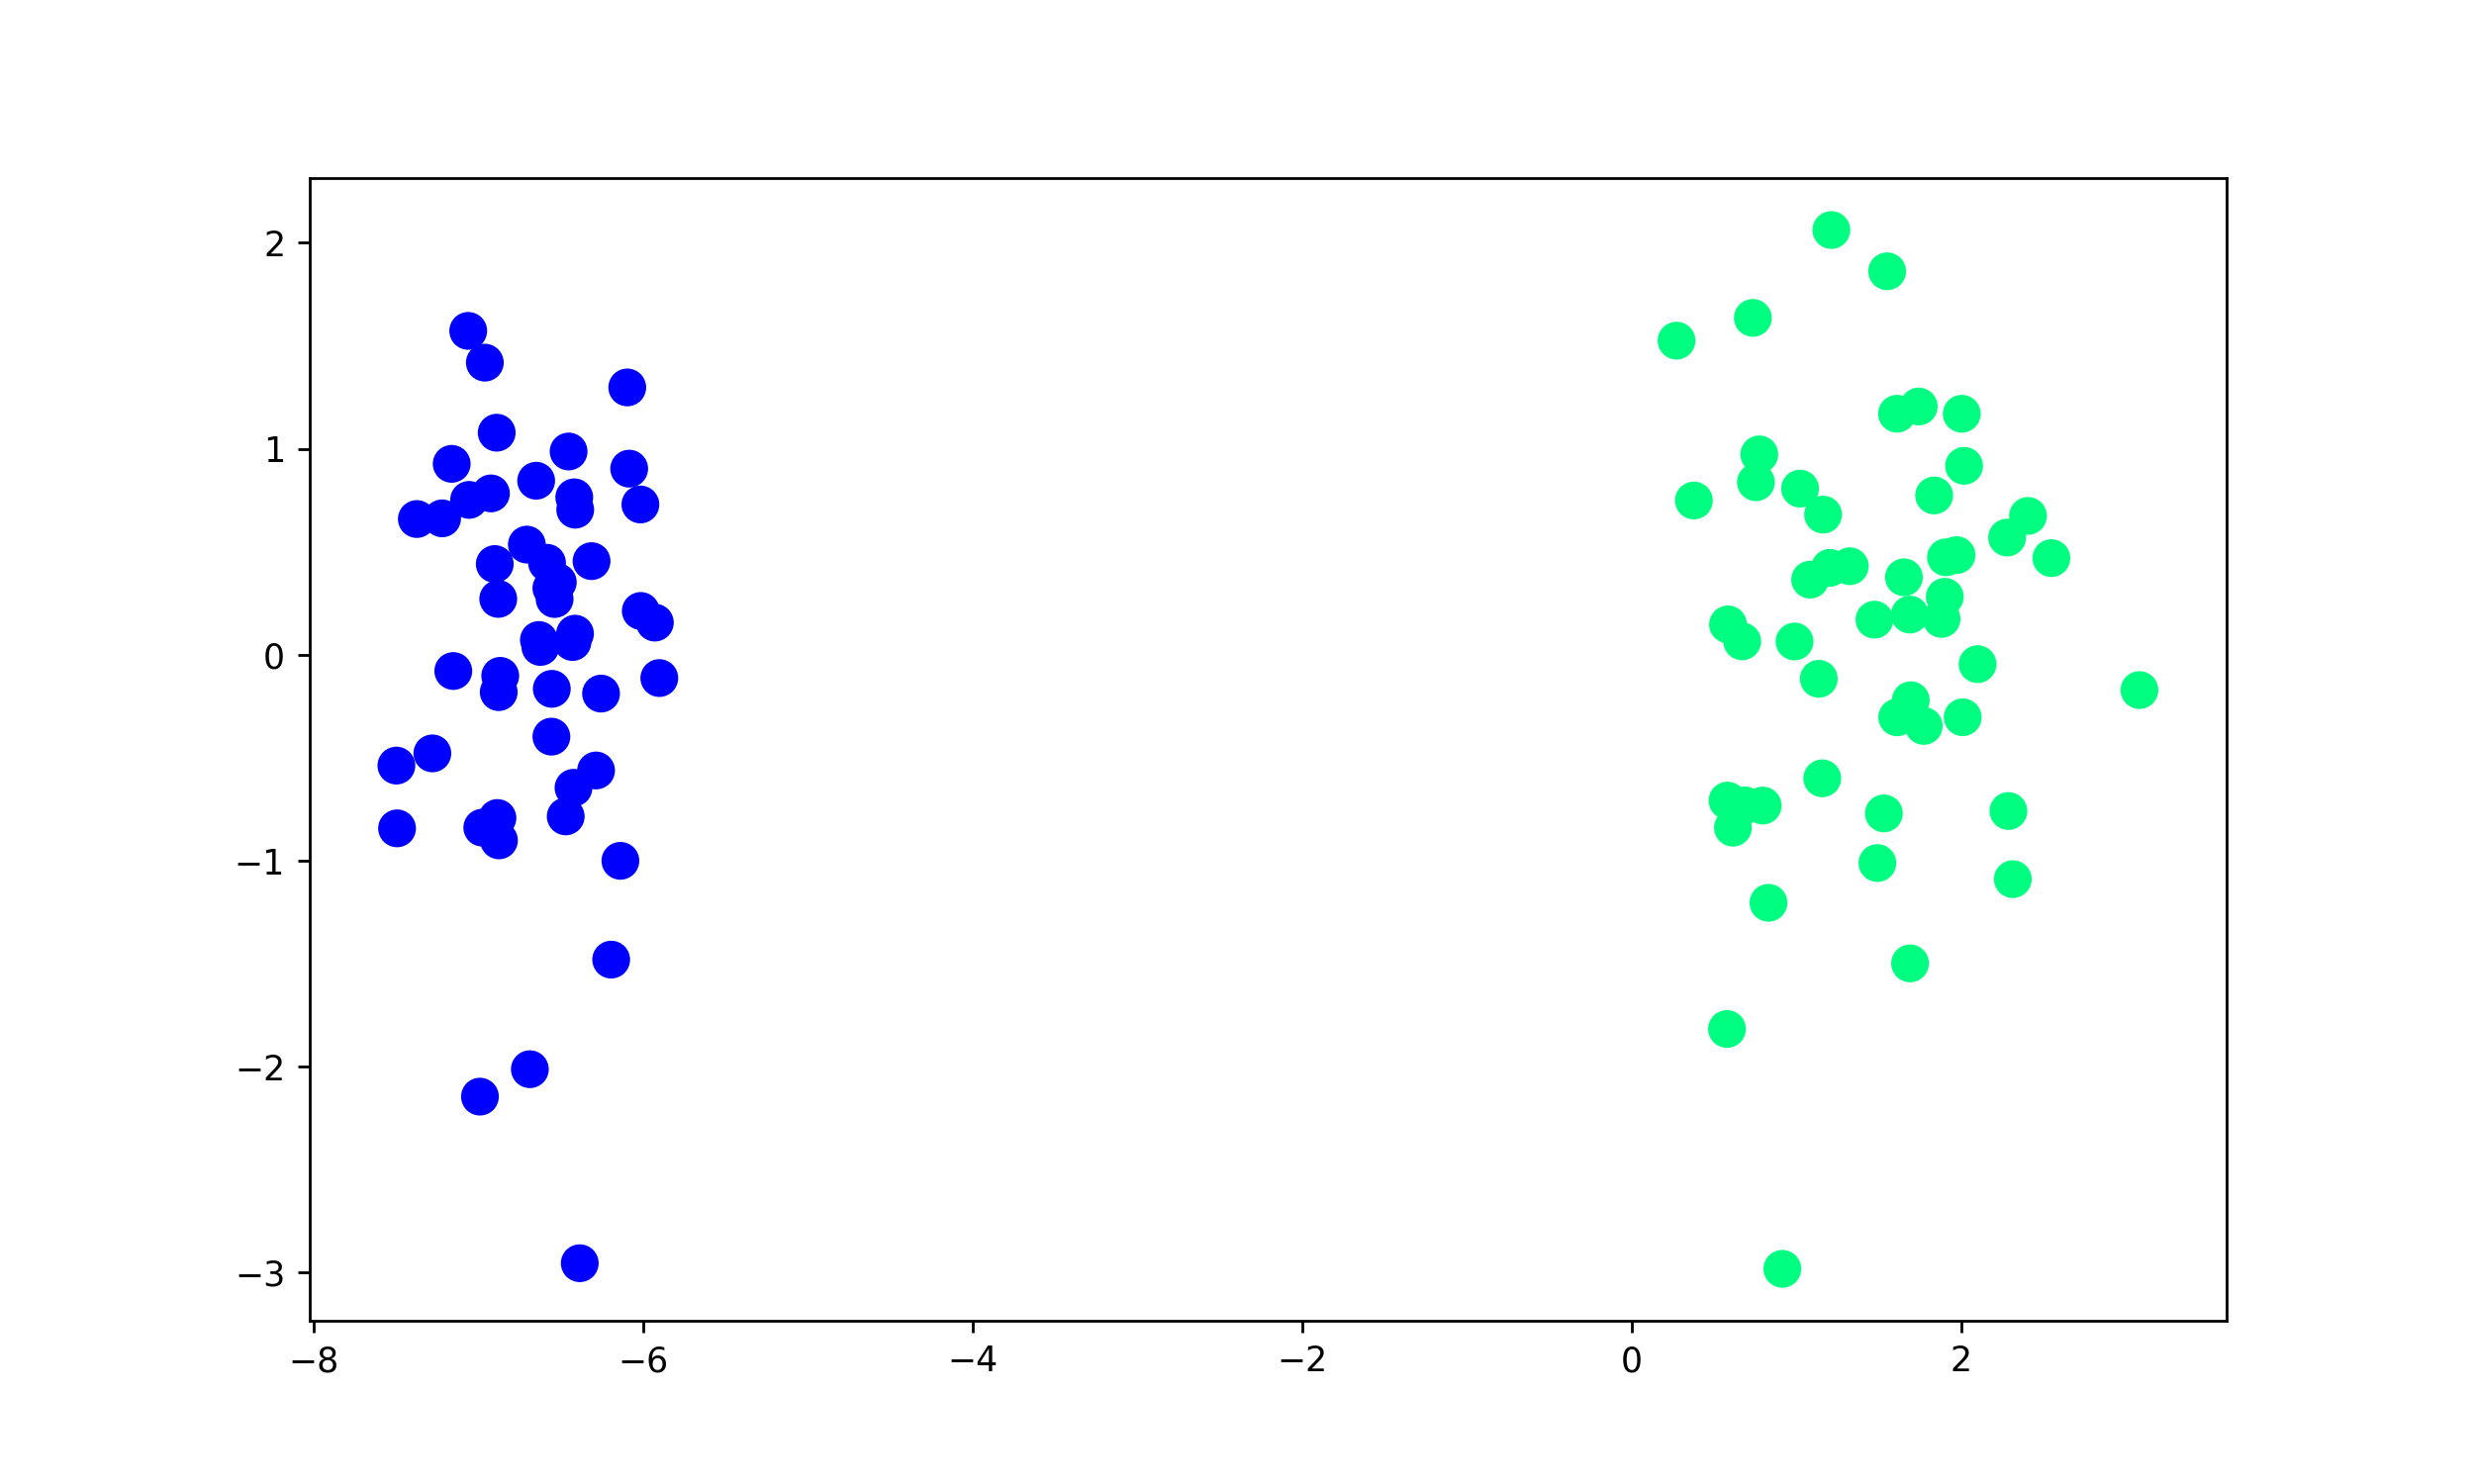

In [28]:
plt.figure(figsize = (10,6))
plt.scatter(X[:, 0],X[:, 1], c = Y, cmap = 'winter', s = 100)

# Perceptron Trick

In [29]:
def perceptron(X, Y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.01
    
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(Y[j] - y_hat)*X[j]
    return weights[0], weights[1:]

In [30]:
def step(z):
    return 1 if z>0 else 0

In [31]:
intercept_ , coef_ = perceptron(X, Y)

In [32]:
intercept_

1.11

In [33]:
coef_

array([1.09382584, 0.69538402])

In [34]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [35]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

<IPython.core.display.Javascript object>


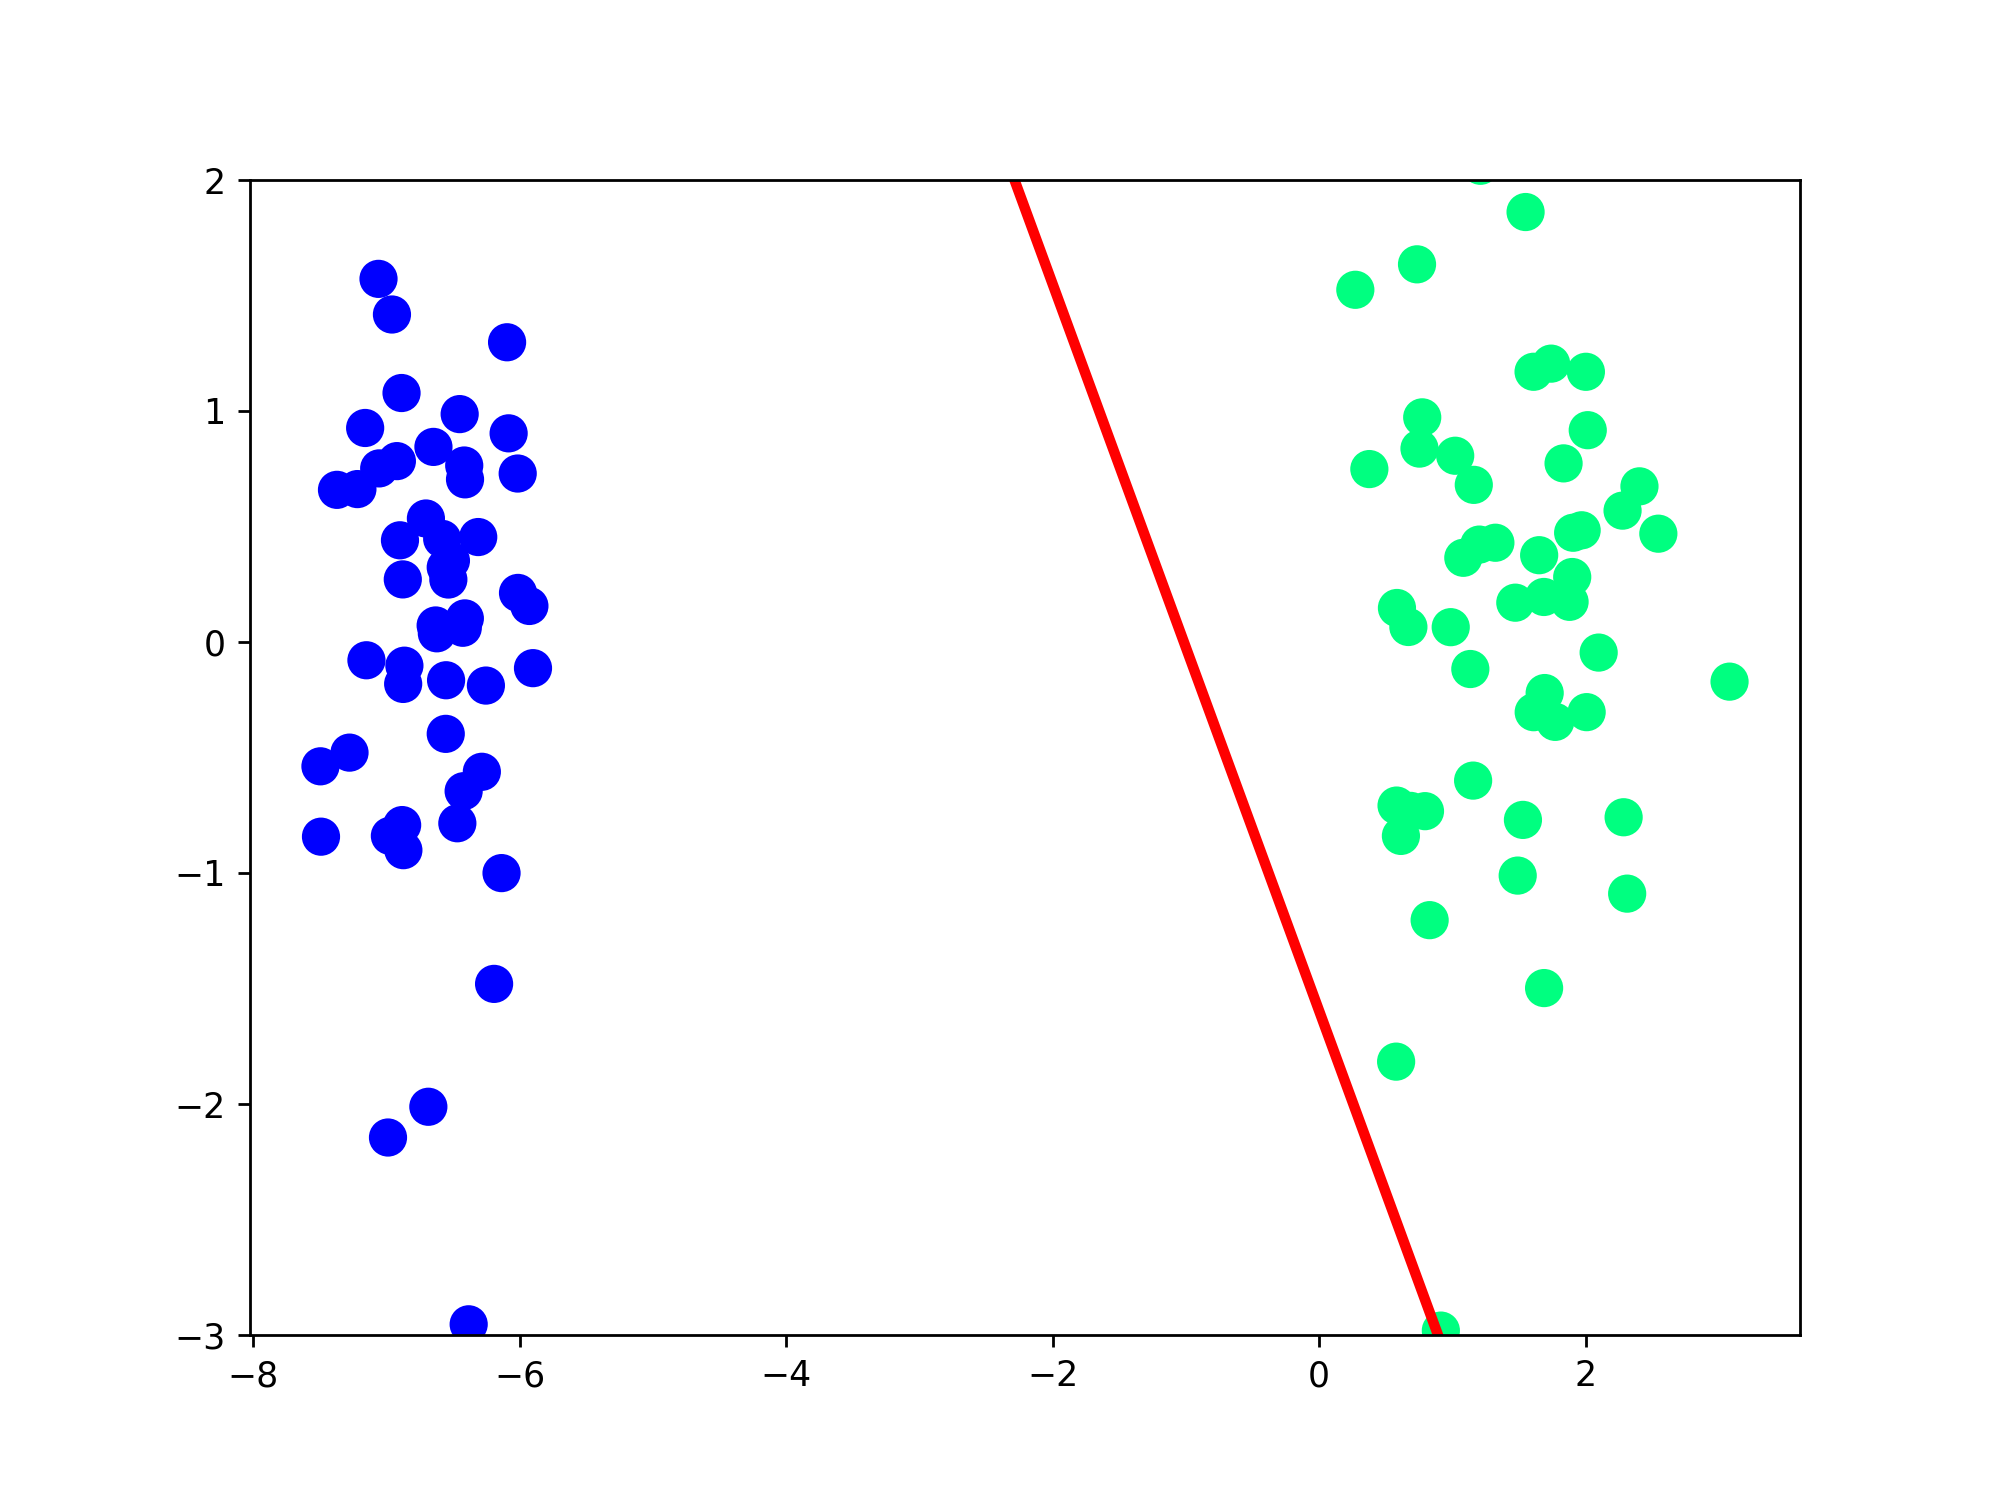

(-3.0, 2.0)

In [36]:
plt.figure(figsize=(8,6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)

# Animation 

<IPython.core.display.Javascript object>


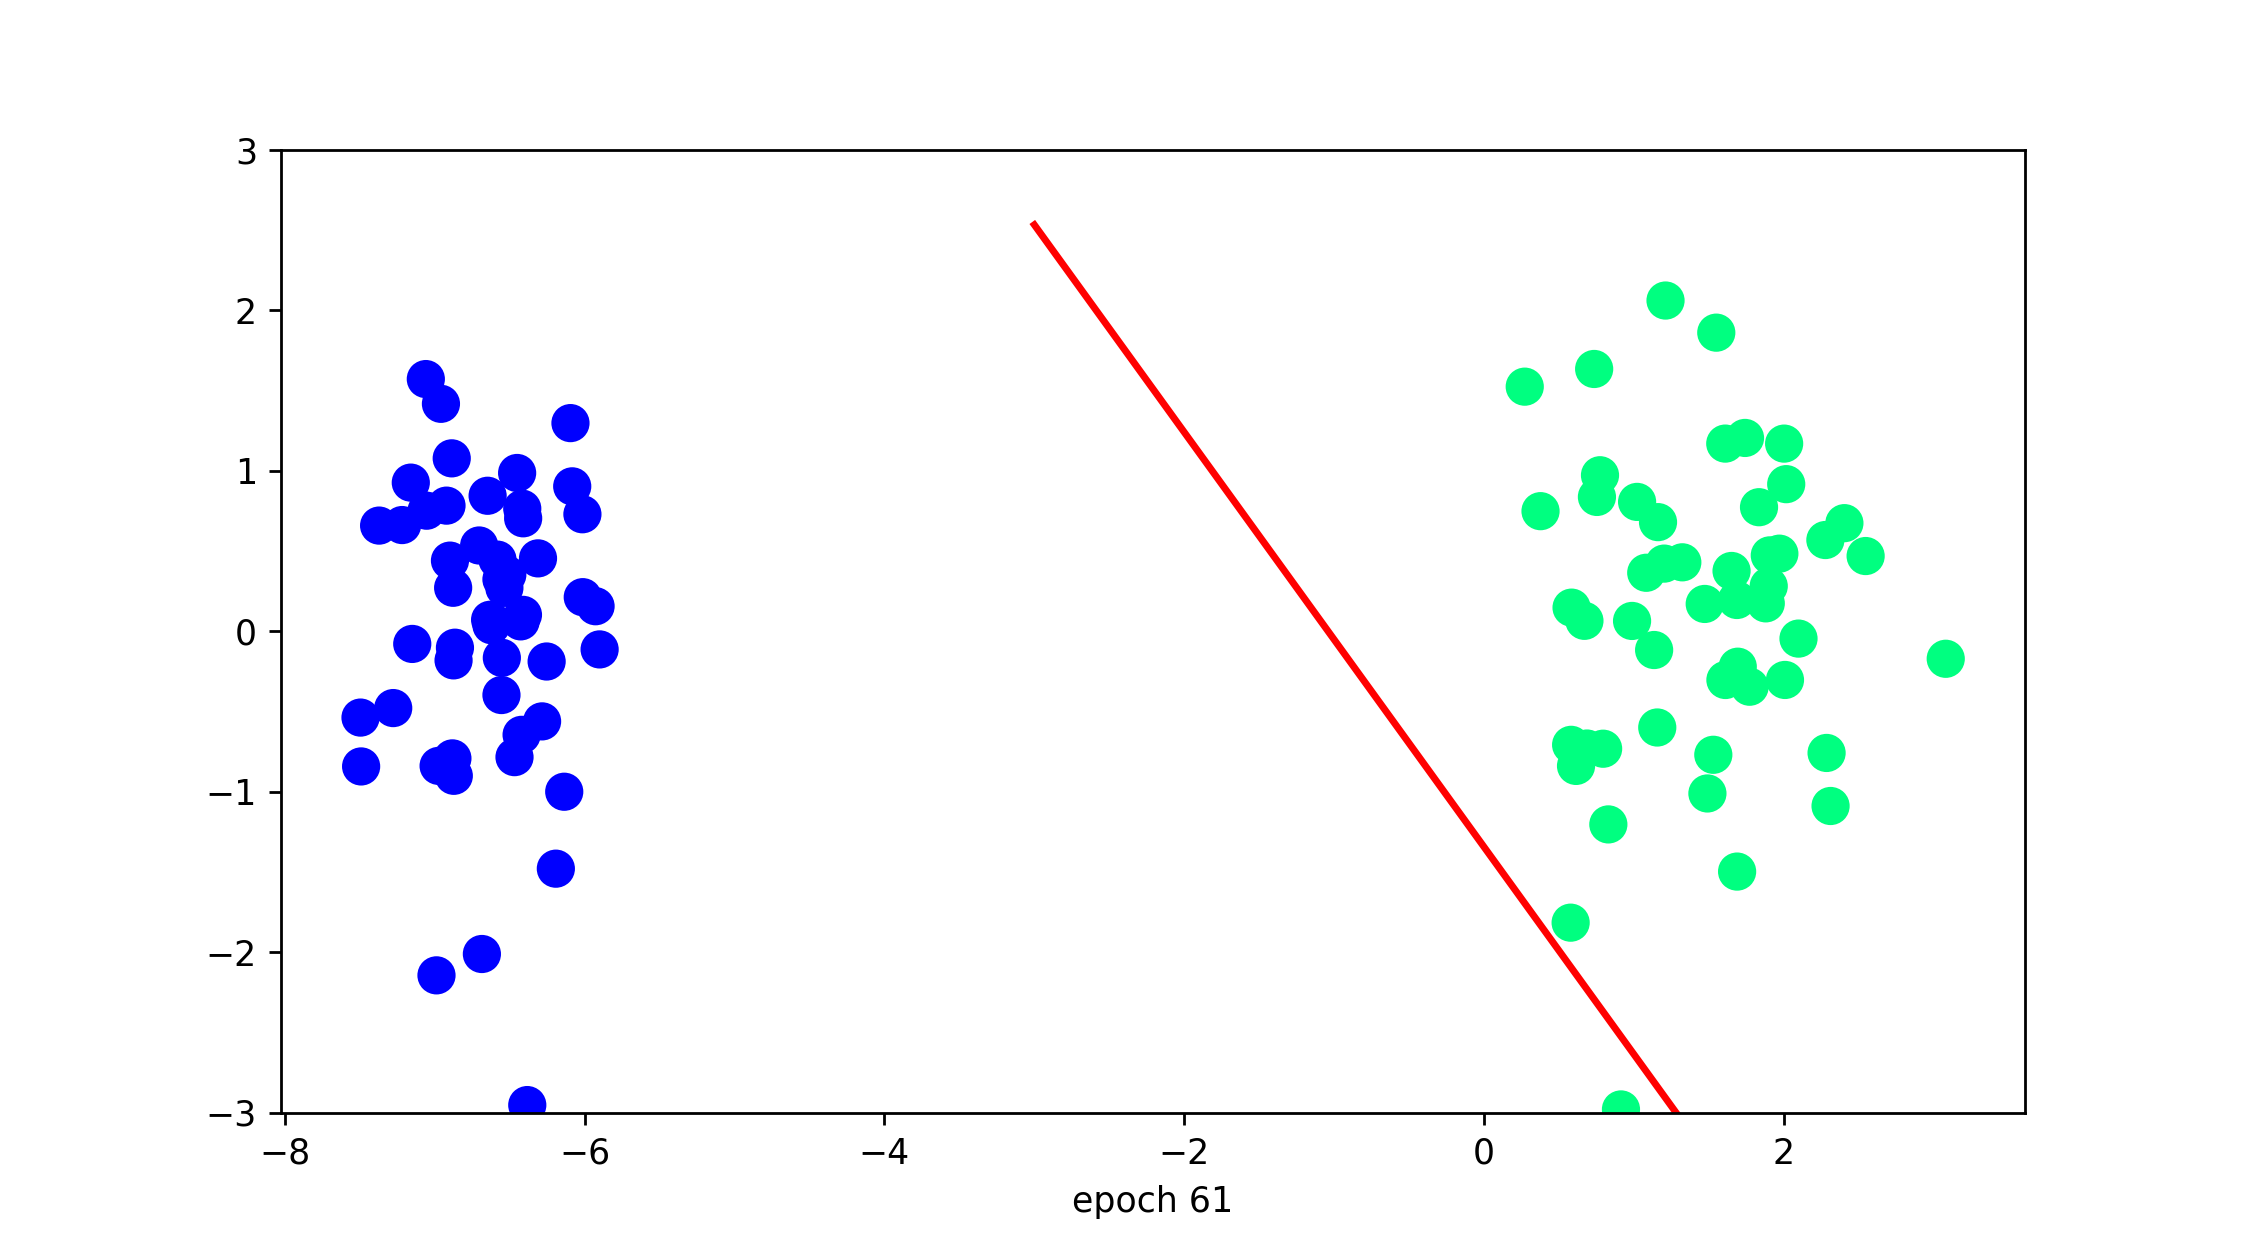

In [37]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(Y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

m,b = perceptron(X,Y)

%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)


# SKlearn Implementation

<IPython.core.display.Javascript object>


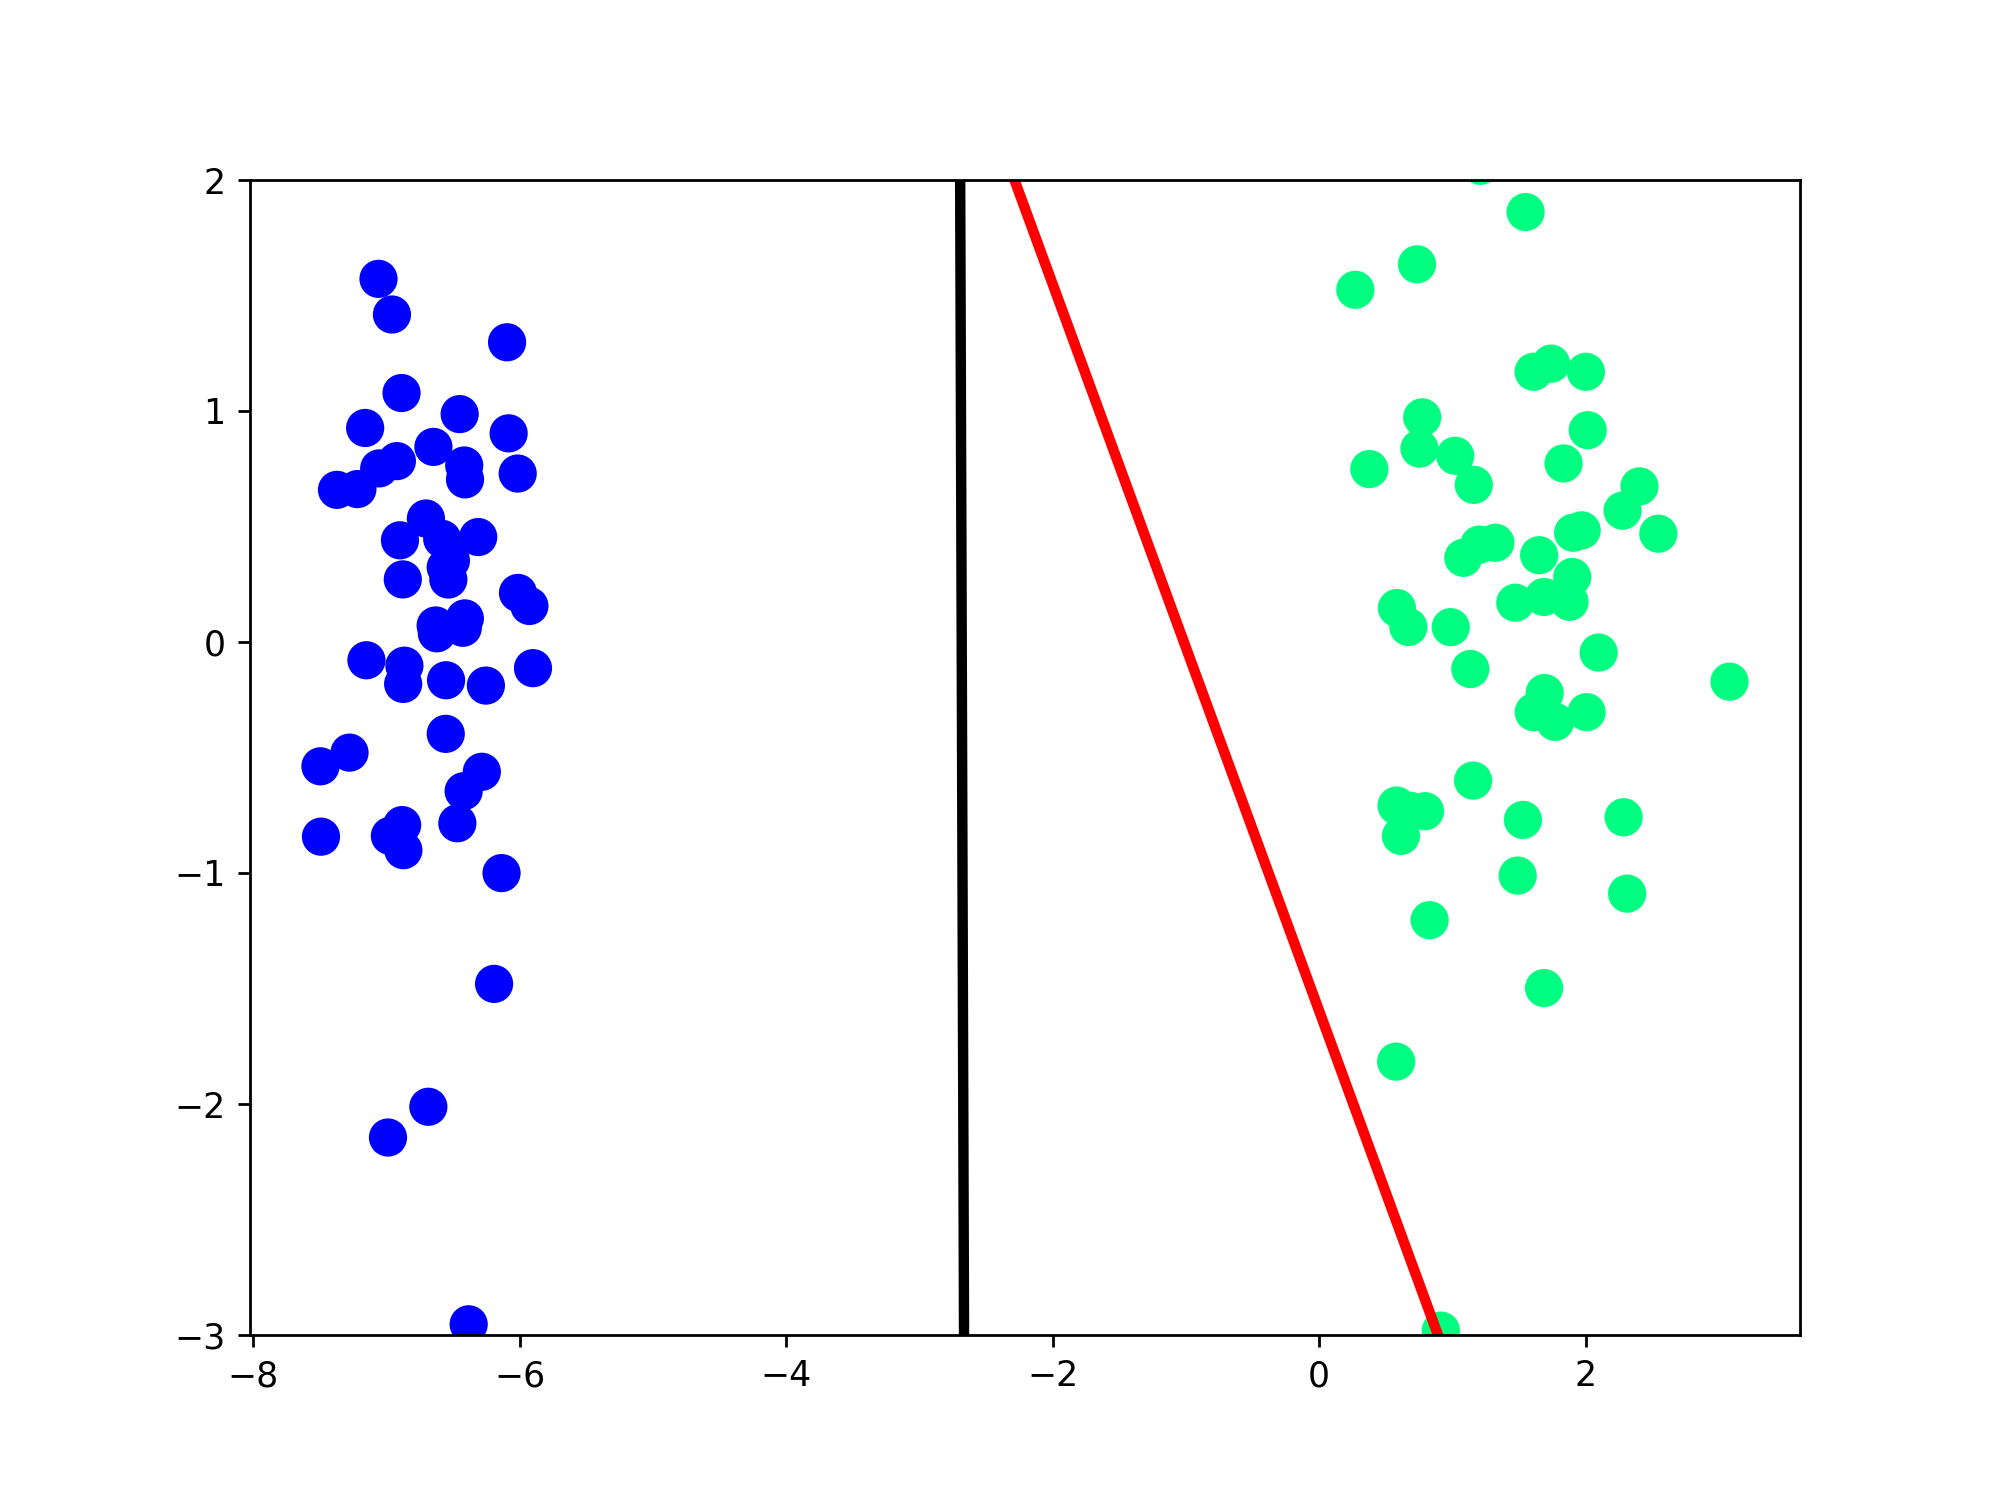

(-3.0, 2.0)

In [38]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(X,Y)

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

plt.figure(figsize=(8,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)

# Perceptron Trick Using Sigmoid Function:

In [39]:
def perceptron(X, Y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.01
    
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr*(Y[j] - y_hat)*X[j]
    return weights[0], weights[1:]

In [40]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [41]:
intercept_ , coef_ = perceptron(X, Y)

In [42]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [43]:
x_inputs = np.linspace(-3,3,100)
y_inputs = m*x_input + b

<IPython.core.display.Javascript object>


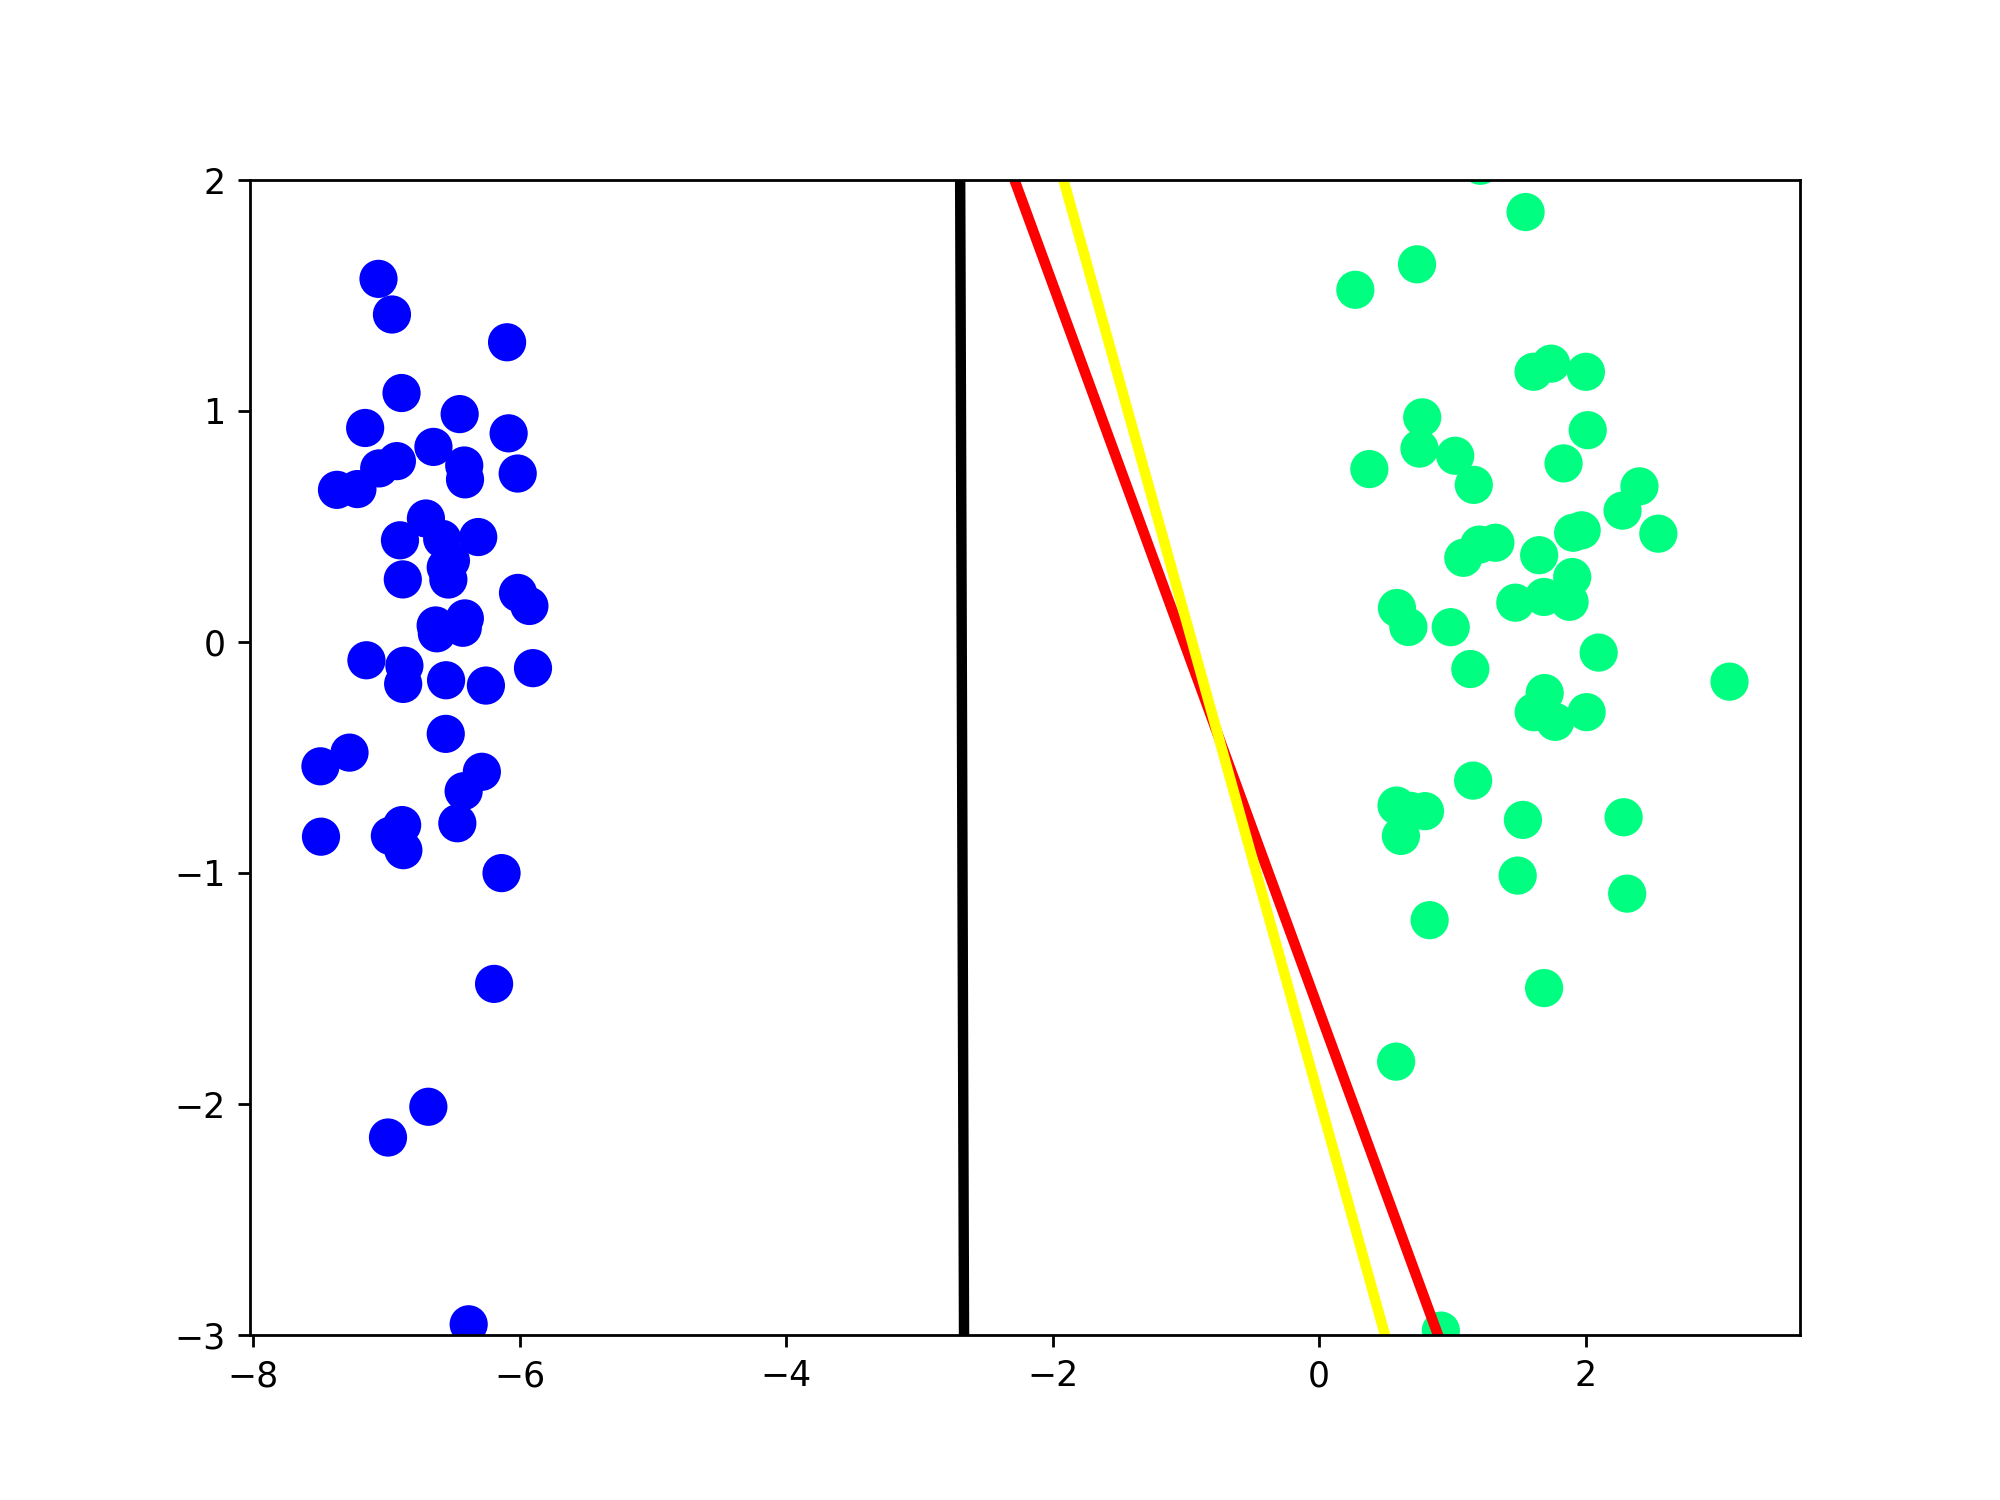

(-3.0, 2.0)

In [45]:
plt.figure(figsize=(8,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_inputs,y_inputs,color='yellow',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)

in the above diagram red one is perceptron trick using step function
---
balck one is sklearn implementation of logistic regression
---
and yellow one is our implementation of perceptron trick using sigmoid function
---